## **Imbalanced data sets (dados desbalanceados)**

Um dos problemas mais comum de machine learning é de classificação. Muito aplicado para detecção de possíveis fraudes, imóveis, mercado financeiro e por ai vai… Porém antes de botar a mão na massa, devemos fazer uma exploração nos dados para detectar se existe um desbalanceamento. 

A classe desbalanceada ocorre quando temos um dataset que possui muitos exemplos de uma classe e poucos exemplos da outra classe. Nessa situação se você tem um modelo de classificação, por exemplo, o resultado desse modelo será enviesado, ou seja ele tende a classificar os novos dados como sendo da classe que possui mais exemplos.

Temos algumas técnicas para lidar com esses dados,nesse tutorial vamos abordar os mais utilizados.

**Undersampling** – Consiste em reduzir de forma aleatória os exemplos da classe majoritária.

**Oversampling** – Consiste em replicar dados aleatórios da classe minoritária. Como estamos duplicando os dados já existentes este método está propício a dar overfitting. 

https://github.com/scikit-learn-contrib/imbalanced-learn

https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

## **Exemplo sem undersampling and oversampling**

**Carregando dataset**

In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

X = data.data
y = data.target

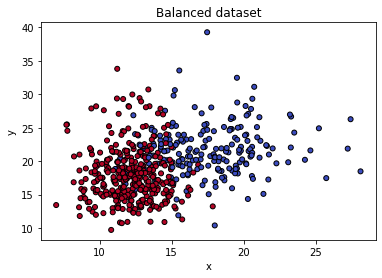

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

plt.title('Balanced dataset')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
           s=25, edgecolor='k', cmap=plt.cm.coolwarm)
plt.show()

In [ ]:
from collections import Counter

print('Dataset shape %s' % Counter(y))

Dataset shape Counter({1: 357, 0: 212})


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score

train, test, train_labels, test_labels = train_test_split(X,
                                                          y,
                                                          test_size=0.3,
                                                          random_state=12,
                                                          stratify=y)

model = tree.DecisionTreeClassifier()
model.fit(train, train_labels)
score = accuracy_score(test_labels, model.predict(test))
print(score) 

0.8830409356725146


# **Undersampling – Consiste em reduzir de forma aleatória os exemplos da classe majoritária.**

- Random majority under-sampling with replacement
- Extraction of majority-minority Tomek links [1]
- Under-sampling with Cluster Centroids
- NearMiss-(1 & 2 & 3) [2]
- Condensed Nearest Neighbour [3]
- One-Sided Selection [4]
- Neighboorhood Cleaning Rule [5]
- Edited Nearest Neighbours [6]
- Instance Hardness Threshold [7]
- Repeated Edited Nearest Neighbours [14]
- AllKNN [14]

https://github.com/scikit-learn-contrib/imbalanced-learn

https://imbalanced-learn.readthedocs.io/en/stable/api.html#module-imblearn.under_sampling

## **RandomUnderSampler**

Classe para realizar subamostragem aleatória.


In [ ]:
from imblearn.under_sampling import RandomUnderSampler

train, test, train_labels, test_labels = train_test_split(X,
                                                          y,
                                                          test_size=0.3,
                                                          random_state=12,
                                                          stratify=y)

rus = RandomUnderSampler(random_state=42)
train_res, train_labels_res = rus.fit_resample(train, train_labels)
print('dataset shape %s' % Counter(train_labels))
print('Resampled dataset shape %s' % Counter(train_labels_res))

model = tree.DecisionTreeClassifier()
model.fit(train_res, train_labels_res)
score = accuracy_score(test_labels, model.predict(test))
print(score) 

dataset shape Counter({1: 250, 0: 148})
Resampled dataset shape Counter({0: 148, 1: 148})
0.9122807017543859


## **RepeatedEditedNearestNeighbours**

Classe para realizar subamostragem com base no método vizinho mais próximo editado repetido.

In [ ]:
from imblearn.under_sampling import RepeatedEditedNearestNeighbours

train, test, train_labels, test_labels = train_test_split(X,
                                                          y,
                                                          test_size=0.3,
                                                          random_state=12,
                                                          stratify=y)

renn = RepeatedEditedNearestNeighbours()
train_res, train_labels_res = renn.fit_resample(train, train_labels)
print('dataset shape %s' % Counter(train_labels))
print('Resampled dataset shape %s' % Counter(train_labels_res))

model = tree.DecisionTreeClassifier()
model.fit(train_res, train_labels_res)
score = accuracy_score(test_labels, model.predict(test))
print(score) 

dataset shape Counter({1: 250, 0: 148})
Resampled dataset shape Counter({1: 210, 0: 148})
0.8830409356725146


## **NearMiss**

Classe para realizar subamostragem com base nos métodos NearMiss.

In [ ]:
from imblearn.under_sampling import NearMiss

train, test, train_labels, test_labels = train_test_split(X,
                                                          y,
                                                          test_size=0.3,
                                                          random_state=12,
                                                          stratify=y)

nm = NearMiss()
train_res, train_labels_res = nm.fit_resample(train, train_labels)
print('dataset shape %s' % Counter(train_labels))
print('Resampled dataset shape %s' % Counter(train_labels_res))

model = tree.DecisionTreeClassifier()
model.fit(train_res, train_labels_res)
score = accuracy_score(test_labels, model.predict(test))
print(score) 

dataset shape Counter({1: 250, 0: 148})
Resampled dataset shape Counter({0: 148, 1: 148})
0.8830409356725146


# **Oversampling – Consiste em replicar dados aleatórios da classe minoritária.** 

- Random minority over-sampling with replacement
- SMOTE - Synthetic Minority Over-sampling Technique [8]
- SMOTENC - SMOTE for Nominal Continuous [8]
- bSMOTE(1 & 2) - Borderline SMOTE of types 1 and 2 [9]
- SVM SMOTE - Support Vectors SMOTE [10]
- ADASYN - Adaptive synthetic sampling approach for imbalanced learning [15]
- KMeans-SMOTE [17]

https://github.com/scikit-learn-contrib/imbalanced-learn

https://imbalanced-learn.readthedocs.io/en/stable/api.html#module-imblearn.over_sampling



## **RandomOverSampler**

Classe para realizar uma super amostragem aleatória.

In [ ]:
from imblearn.over_sampling import RandomOverSampler

train, test, train_labels, test_labels = train_test_split(X,
                                                          y,
                                                          test_size=0.3,
                                                          random_state=12,
                                                          stratify=y)

rs = RandomOverSampler()
train_res, train_labels_res = rs.fit_resample(train, train_labels)
print('dataset shape %s' % Counter(train_labels))
print('Resampled dataset shape %s' % Counter(train_labels_res))

model = tree.DecisionTreeClassifier()
model.fit(train_res, train_labels_res)
score = accuracy_score(test_labels, model.predict(test))
print(score) 

dataset shape Counter({1: 250, 0: 148})
Resampled dataset shape Counter({0: 250, 1: 250})
0.8888888888888888


## **SMOTE**

This object is an implementation of SMOTE - Synthetic Minority Over-sampling Technique as presented in [R001eabbe5dd7-1].

In [ ]:
from imblearn.over_sampling import SMOTE

train, test, train_labels, test_labels = train_test_split(X,
                                                          y,
                                                          test_size=0.3,
                                                          random_state=12,
                                                          stratify=y)

s = SMOTE()
train_res, train_labels_res = s.fit_resample(train, train_labels)
print('dataset shape %s' % Counter(train_labels))
print('Resampled dataset shape %s' % Counter(train_labels_res))

model = tree.DecisionTreeClassifier()
model.fit(train_res, train_labels_res)
score = accuracy_score(test_labels, model.predict(test))
print(score) 

dataset shape Counter({1: 250, 0: 148})
Resampled dataset shape Counter({0: 250, 1: 250})
0.9122807017543859


## **ADASYN**

Realize uma super amostragem usando a abordagem de amostragem Sintético Adaptável (ADASYN) para conjuntos de dados desequilibrados.

In [ ]:
from imblearn.over_sampling import ADASYN

train, test, train_labels, test_labels = train_test_split(X,
                                                          y,
                                                          test_size=0.3,
                                                          random_state=12,
                                                          stratify=y)

ada = ADASYN(random_state=50)
train_res, train_labels_res = ada.fit_resample(train, train_labels)
print('dataset shape %s' % Counter(train_labels))
print('Resampled dataset shape %s' % Counter(train_labels_res))

model = tree.DecisionTreeClassifier()
model.fit(train_res, train_labels_res)
score = accuracy_score(test_labels, model.predict(test))
print(score) 

dataset shape Counter({1: 250, 0: 148})
Resampled dataset shape Counter({0: 259, 1: 250})
0.8947368421052632


# **Aplicando técnicas para datasets desbalanceados com Cross-validation**

In [ ]:
from sklearn.model_selection import ShuffleSplit
from imblearn.over_sampling import SMOTE
import numpy as np

data = load_breast_cancer()
X = data.data
y = data.target

score = []
smt = SMOTE(random_state = 42)
ss = ShuffleSplit(n_splits = 10, test_size = 0.25, random_state=0)

for train_index, test_index in ss.split(X, y):
    # print("%s %s" % (train_index, test_index))
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    X_train_res, y_train_res = smt.fit_resample(X_train, y_train)
    print('dataset shape %s' % Counter(y_train))
    print('Resampled dataset shape %s' % Counter(y_train_res))
    
    model = tree.DecisionTreeClassifier()
    model.fit(X_train_res, y_train_res)
    score.append(accuracy_score(y_test, model.predict(X_test)))
print(np.mean(score))

dataset shape Counter({1: 267, 0: 159})
Resampled dataset shape Counter({1: 267, 0: 267})
dataset shape Counter({1: 271, 0: 155})
Resampled dataset shape Counter({0: 271, 1: 271})
dataset shape Counter({1: 271, 0: 155})
Resampled dataset shape Counter({1: 271, 0: 271})
dataset shape Counter({1: 267, 0: 159})
Resampled dataset shape Counter({1: 267, 0: 267})
dataset shape Counter({1: 273, 0: 153})
Resampled dataset shape Counter({1: 273, 0: 273})
dataset shape Counter({1: 262, 0: 164})
Resampled dataset shape Counter({1: 262, 0: 262})
dataset shape Counter({1: 263, 0: 163})
Resampled dataset shape Counter({1: 263, 0: 263})
dataset shape Counter({1: 275, 0: 151})
Resampled dataset shape Counter({0: 275, 1: 275})
dataset shape Counter({1: 259, 0: 167})
Resampled dataset shape Counter({0: 259, 1: 259})
dataset shape Counter({1: 272, 0: 154})
Resampled dataset shape Counter({0: 272, 1: 272})
0.9188811188811188
